# **AP155 Lab Assignment Guide** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

**Start from this guide and fill in the missing code following the inserted comments (lines starting with #). Explain the solution in your own words (inserting text cells).** 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **December 9 (recommended); January 8 (final)**



### Student Information 

_Full Name (Last Name, First Name)_: \Salazar, Sameuel Rock
_Student No._:\2018 05248
_Section_: WFU-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

1. Insert your discussion of the solution below HERE.

In [ ]:
from math import sin
from numpy import array,arange

# user-defined function, following odesim.py in Example 8.5 of Newman text 
def f(r,t): # defines a function of the vector r (defined too by x and y) and domain t
    alpha, beta, gamma, delta = 1.0, 0.5, 0.5, 2.0 # defined parameters
    x = r[0] 
    y = r[1] # designates the first and second element of the vector/array r as x and y
    fx = alpha*x - beta*x*y 
    fy = gamma*x*y - delta*y # defined formulae based on Lotka-Volterra equations
    return array([fx,fy],float) # makes a matrix of this system of non-linear equations

# Runge-Kutta (4th Order) Method

a = 0 # interval start
b = 10 # interval end
N = 10**3 # number of slices
h = (b-a)/N

tpoints = arange(a,b,h) # makes an interval for t; from a to b, with h steps
xpoints = [] 
ypoints = [] # makes empty arrays available for adding elements 

r = 2, 2 # initial conditions for the vector r
for t in tpoints: 
    xpoints.append(r[0])
    ypoints.append(r[1]) # adding entries on the designated empty lists
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6


2. Insert your discussion of the solution below and your description of your chart HERE (it should look similar to the one below).



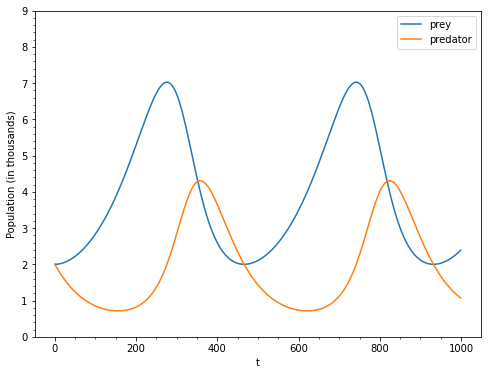

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(xpoints, label = "prey") # plot curve for population of rabbits/prey
plt.plot(ypoints, label = "predator") # plot curve for population of foxes/predator
plt.xlabel("t") # label for horizontal axis
plt.ylabel("Population (in thousands)")  # label for vertical axis
plt.ylim(0, 9) # set y-axis limits
plt.legend(loc="best") # good to keep as is; this adds legend
plt.minorticks_on() # good to keep as is; show minor axis ticks

# This graph shows the approximated relationship between the populations of idealized prey and predator. 
# It shows that the rate for change of the population is proportional to its size
# This also shows that the generations of predator and prey are continuously overlapping

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


1. Insert your description of the solution below HERE.

In [ ]:
from math import sin
from numpy import array,arange,pi

# define initial values 
theta_i = 179*pi/180 # units of rad
omega_i = 0.0 # units of rad/s

# define parameters
g = 9.81 # units of m/s^2
l = 0.10 # units of m

def f(r,t):

    theta = r[0]
    omega = r[1] # setting the rows of vector r into theta and omega, respectively
    f_theta = omega # angular velocity d_theta/dt is constant
    f_omega = -(g/l)*sin(theta) # angular acceleration of nonlinear pendulum
    return array([f_theta,f_omega],float)

# Time Domain t
a = 0 # interval start
b = 10 # interval end
N = 1000 # number of slices
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = [] # setting null spaces to catch the results from the 'for' loop

# RK4 Proper
r = theta_i, omega_i # initial conditions for theta and omega
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6


2. Insert your discussion of the solution below and your description of your chart HERE (it should look similar to the one below).



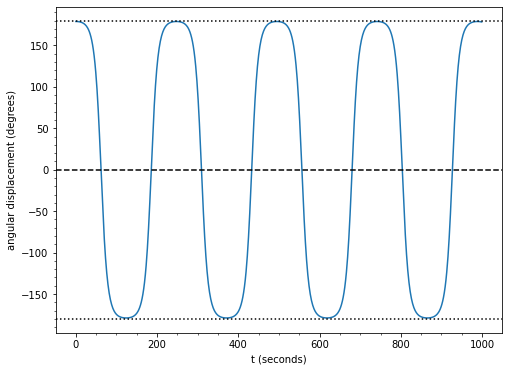

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.array(xpoints)*180/pi # convert ```xpoints``` calculated above, from radians to degrees
# numpy array is used for element-wise scalar operations on an array
plt.figure(figsize=(8,6))
plt.plot(theta) # plot curve of the angular displacement, theta, over time
# add horizontal guidelines -- good to keep as is
plt.axhline(0, color="black", ls='--')
plt.axhline(180, color="black", ls=':')
plt.axhline(-180, color="black", ls=':')
# add labels for the axes
plt.xlabel("t (seconds)") 
plt.ylabel("angular displacement (degrees)")
# set horizontal axis limits 
plt.xlim() 
# good to keep as is; this adds minor axis ticks
plt.minorticks_on() 

# The graph shows the angular displacement of a nonlinear pendulum over time.
# It has an extrema at +-179 degrees, following the Law of Conservation of Energy.
# Most of the time, the object has large acceleration, slowing down only near the turning points

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



1. Insert your discussion of the solution below HERE -- the first part of the solution calculates for the energy of the ground state (you should be able to reproduce the result below).

In [ ]:
from numpy import array,arange
import numpy as np

# Define constants
m =  9.1094e-31  # Mass of electron
hbar = 1.0546e-34 # Planck's constant over 2*pi
e =   1.0622e-19 # Electron charge

# Define parameters 
V0 = 50*e # units of Joules
a =  1e-11 #in units of m

# Define interval
x1 = -10*a # set interval start 
x2 = 10*a # set interval end
N = 1000 # set number of slices
h = (x2-x1)/N

# Potential function
def V(x):
    return V0*x**2/a**2 # defined potential function

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi 
    fphi = (2*m/hbar**2)*(V(x) - E)*psi # formulae for dpsi/dt and dphi/dt
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0 
    phi = 1.0 # initial values for psi and phi
    r = array([psi,phi],float)

    for x in arange(x1,x2,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0 # insert inital value of the first (of two) energy values for the secant method -- in units of J
E2 = e # insert inital value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1) # solve for the wavefunction for the first value of E

target = e/1000 # target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2, solve(E2) # updated values for the iteration
    E1,E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1) # updated values for the iteration

E_ground = E2/e # convert energy from Joules to eV and store
print("Ground state E =",E_ground,"eV")

Ground state E = 169.51562537022716 eV


Insert your discussion of the solution below HERE -- this part of the solution calculates for the energy of the first excited state (you should be able to reproduce the result below).

In [ ]:
# Find another energy level using the secant method
E1 = e*200 # insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = e*400 # insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000 # insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2, solve(E2) # update values for the iteration
    E1,E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1) # update values for the iteration

E_excited1 = E2/e # convert energy from Joules to eV and store
print("First excited state E =",E_excited1,"eV")

First excited state E = 508.5468765478838 eV


Insert your discussion of the solution below HERE -- this part of the solution calculates for the energy of the second excited state (you should be able to reproduce the result below).

In [ ]:
# Find another energy level using the secant method
E1 = e*600 # insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = e*700 # insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000 # insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2, solve(E2) # update values for the iteration
    E1,E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1) # update values for the iteration

E_excited2 = E2/e
print("Second excited state E =",E_excited2,"eV")

Second excited state E = 847.5781295178978 eV


In [ ]:
print("The first and second excited states have energies %.10f and %.10f times the ground energy state" % (E_excited1/E_ground, E_excited2/E_ground)) 

The first and second excited states have energies 3.0000000026 and 5.0000000157 times the ground energy state


Insert your description of the results above HERE.

2. Insert your discussion of the solution below HERE. Re-use the code from Part 1 to find the solutions for the given potential function for Part 2. You should get the ff. energies for the ground state and first 2 excited states: 205 eV, 736 eV, and 1443 eV. 

In [ ]:
# New Potential Function
def V(x):
  return V0*x**4/a**4

# Ground State Energy
E1 = 0.0 # insert inital value of the first (of two) energy values for the secant method -- in units of J
E2 = e # insert inital value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1) # solve for the wavefunction for the first value

target = e/1000 # target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2, solve(E2) # updated values for the iteration
    E1,E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1) # updated values for the iteration

E_ground2 = E2/e # convert energy from Joules to eV and store
print("Ground state E =",E_ground2,"eV")

# First Excited State Energy
E1 = e*300 # insert inital value of the first (of two) energy values for the secant method -- in units of J
E2 = e*600 # insert inital value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1) # solve for the wavefunction for the first value

target = e/1000 # target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2, solve(E2) # updated values for the iteration
    E1,E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1) # updated values for the iteration

E_excited12 = E2/e # convert energy from Joules to eV and store
print("First Excited State E =",E_excited12,"eV")

# Second Excited State Energy
E1 = e*1300# insert inital value of the first (of two) energy values for the secant method -- in units of J
E2 = e*1500 # insert inital value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1) # solve for the wavefunction for the first value

target = e/1000 # target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2, solve(E2) # updated values for the iteration
    E1,E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1) # updated values for the iteration

E_excited22 = E2/e # convert energy from Joules to eV and store
print("Second Excited State E =",E_excited22,"eV")

print("The first and second excited states have energies %.10f and %.10f times the ground energy state" % (E_excited12/E_ground2, E_excited22/E_ground2)) 

Ground state E = 270.02906111899597 eV
First Excited State E = 967.6148880531284 eV
Second Excited State E = 1898.6487396616283 eV
The first and second excited states have energies 3.5833731527 and 7.0312755664 times the ground energy state


Insert your description of the results above HERE.

3. Insert your discussion of the solution below HERE.

In [ ]:
# Define interval
x1 = -5*a # interval start
x2 = 5*a # interval end
N =  1000 # no. of slices
h = (x2-x1)/N

# Potential function
def V(x):
    return V0*x**4/a**4 # insert potential function

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi 
    fphi = (2*m/hbar**2)*(V(x) - E)*psi # formulae for dpsi/dt and dphi/dt
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy and return 2 arrays: x, psi
def get_psi(E):

    # initialize
    tpoints = arange(x1,x2,h) # x -> t
    xpoints = []              # psi -> x
    ypoints = []              # phi -> y
    
    # set initial conditions
    psi = 0.0 # set initial value
    phi = 1.0 # set initial value
    r = array([psi,phi],float)

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t,E)
        k2 = h*f(r+0.5*k1,t+0.5*h,E)
        k3 = h*f(r+0.5*k2,t+0.5*h,E)
        k4 = h*f(r+k3,t+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    x_grid = np.array(tpoints)
    psi_grid = np.array(xpoints)
    return x_grid, psi_grid

Insert discussion of the next part of the solution below HERE.



In [ ]:
# Get wavefunction for the first 3 energy levels
E = E_ground2*e
x_grid, psi_grid1 = get_psi(E)

E = E_excited12*e
x_grid, psi_grid2 = get_psi(E)

E = E_excited22*e
x_grid, psi_grid3 = get_psi(E)

Insert discussion of the next part of the solution below HERE. The code below applies the trapezoidal rule to get the integral of the wavefunction over the interval over which it had been calculated-- defined in the numpy arrays above.

In [ ]:
def get_integral(xx, yy):

  N = len(xx)
  s = 0.5*yy[0] + 0.5*yy[-1]
  for k in range(1,N):
    s += yy[k]

  return s

Insert discussion of the next part of the solution below HERE. In the code below, calculate the normalization factors for the 3 wavefunctions (you should be able to reproduce the values below).

In [ ]:
c1 = 1/get_integral(x_grid, psi_grid1) # insert formula
c2 = 1/get_integral(x_grid, psi_grid2) # insert formula
c3 = 1/get_integral(x_grid, psi_grid3) # insert formula

print("Normalization factors for the first 3 energy states: %.6e, %.6e, %.6e" % (c1,c2,c3))

Normalization factors for the first 3 energy states: 7.307983e+03, 2.830693e+09, 1.400283e+05


In the code below, define the normalized wavefunctions.

In [ ]:
psi_norm1 = c1*np.array(get_psi(E_ground2*e)) # insert formula
psi_norm2 = c2*np.array(get_psi(E_excited12*e)) # insert formula
psi_norm3 = c3*np.array(get_psi(E_excited22*e)) # insert formula

4. Insert your discussion of the solution and your description of your plot below HERE (it should look similar to the one below).

Text(0, 0.5, 'psi(x)')

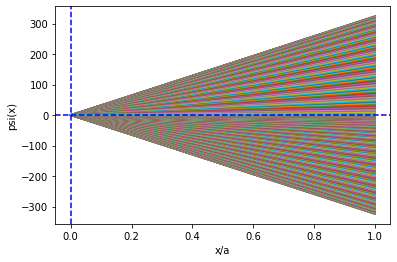

In [ ]:
import matplotlib.pyplot as plt

xplot = x_grid/a # plot the scaled position (by a) 
plt.plot(psi_norm1) # plot wavefunction of ground state 
plt.plot(psi_norm2) # plot wavefunction of first excited state 
plt.plot(psi_norm3) # plot wavefunction of second excited state 

# insert guidelines -- OK to keep as is
plt.axhline(0.0, ls='--', color='blue')
plt.axvline(0.0, ls='--', color='blue')
plt.xlabel("x/a") # label horizontal axis
plt.ylabel("psi(x)") # label vertical axis